# Paradigme fonctionnel

## Objectif: Découvrir un nouveau paradigme de programmation

## 1. Problématique

**Le tri**: Une fonctionnalité très utilisée en programmation.

Tous les algorithmes ont-ils la même efficacité?

**Peut-on concevoir un outil de comparaison des algorithmes de tri?**

## 2. Algorithmes de tri

### 2.1 Tri par sélection

En partant du début du tableau et pour chaque élément de rang *n*:
- Rechercher la plus petite valeur et la permuter avec l'élément de rang *n*.

<div align="middle"><img src="ressources/selection.gif" width=300px></div>

### 2.2 Tri par insertion

En partant du début du tableau et pour chaque élément de rang *n*:
- Mémoriser l'élément de rang *n*.
- En partant de l'élément *n-1*, décaler vers la droite les éléments qui sont plus grands que celui mémorisé.
- Placer dans le trou l'élément mémorisé.

<div align="middle"><img src="ressources/insertion.gif" width=300px></div>

### 2.3 Tri à bulles

En partant du début du tableau et pour chaque élément de rang *n*:
- Parcourir le tableau en comparant chaque élément avec son successeur.
- Si ce dernier est le plus petit des deux, les permuter.

<div align="middle"><img src="ressources/bulle.gif" width=300px></div>

## 3. Notion de complexité

In [1]:
def tri_selection(tab):
    taille = len(tab)
    for i in range(taille):
        rang_mini = i
        for j in range (i+1,taille):
            if tab[j] < tab[rang_mini]:
                rang_mini = j
        tab[i],tab[rang_mini] = tab[rang_mini],tab[i]
    return tab

In [2]:
from random import randint
tab = [randint(0, 100) for _ in range(20)]
print(tab)
print(tri_selection(tab))

[4, 18, 81, 37, 9, 6, 7, 82, 10, 33, 1, 9, 23, 9, 92, 4, 30, 19, 36, 38]
[1, 4, 4, 6, 7, 9, 9, 9, 10, 18, 19, 23, 30, 33, 36, 37, 38, 81, 82, 92]


#### La **complexité en temps** du tri par sélection est en $O(n^2)$.

#### Activité 2: Déterminer la complexité en temps des algorithmes de tri à bulles et tri par insertion.

#### Activité 2: Correction tri à bulles

In [3]:
def tri_bulles(tab):
    taille = len(tab)
    for passage in range(taille):
        for j in range(1,taille - passage):
            if tab[j] < tab[j-1]:
                tab[j],tab[j-1] = tab[j-1],tab[j]
    return tab

#### La **complexité en temps** du tri à bulles est en $O(n^2)$.

Une amélioration du tri à bulles

In [4]:
def tri_bulles_optimise(tab):
    taille = len(tab)
    permutation = True
    passage = 0
    while permutation == True:
        permutation = False
        for j in range(1, taille - passage):
            if tab[j] < tab[j-1]:
                permutation = True
                tab[j],tab[j-1] = tab[j-1],tab[j]
        passage = passage + 1
    return tab

- Si le tableau est déjà trié **la complexité dans le meilleur des cas** est en $O(n)$.
- Si le tableau est trié à l'envers **la complexité dans le pire des cas** est en $O(n^2)$.
- **La complexité en moyenne** est en $O(n^2)$.

#### Activité 2: Correction tri par insertion

In [5]:
def tri_insertion(tab):
    taille = len(tab)
    for i in range(1,taille):
        en_cours = tab[i]
        j = i-1
        while j >= 0 and tab[j] > en_cours:
            tab[j+1] = tab[j]
            j -= 1
        tab[j+1] = en_cours
    return tab

Étudions dans le meilleur et le pire des cas.

- Si le tableau est déjà trié **la complexité dans le meilleur des cas** est en $O(n)$.
- Si le tableau est trié à l'envers **la complexité dans le pire des cas** est en $O(n^2)$.
- **La complexité en moyenne** est en $O(n^2)$.

## 4. Comparaison des temps d'exécution

### 4.1 Contexte

Des fonctions avec un schéma identique:
- acceptent une liste en entrée,
- renvoient la liste triée en sortie.

Une bibliothèque Python pour mesurer le temps:

In [6]:
from time import time

### 4.2 Paradigme fonctionnel
Une fonction est une donnée comme une autre.

## Contexte historique
<div align="middle">
<a href="https://cdn.knightlab.com/libs/timeline3/latest/embed/index.html?source=1VuqokRaePyHE5qWm3uZrQM6wbRUHuGUgruzKgna7Fzc&font=Default&lang=fr&initial_zoom=2&height=650" target=_blank><img src="../../../../retour.png"></a></div>

### Activité 3: 
Implémenter une fonction **duree_tri(fonction, tab: list) $\rightarrow$ float** qui mesure la durée que met *fonction* pour trier la liste *tab* et renvoie cette durée.

In [7]:
from time import time

def duree_tri(fonction, tab: list)->float:
    deb = time()
    tab = fonction(tab)
    fin = time()
    return fin-deb

Une version améliorée:

In [8]:
def duree_tri(fonction, tab: list)->tuple:
    deb = time()
    tab = fonction(tab)
    fin = time()
    return (fonction.__name__, fin-deb)

### 4.3 Paradigme fonctionnel: données immuables

Le paradigme fonctionnel veut s'affranchir des **effets de bord**.

### Activité 4

In [9]:
notes = [7,12,8,5,19,10,7,6,1,15,13,8]

def majoration(bonus: int):
    for i in range(len(notes)):
        if notes[i] <= 8:
            notes[i] += bonus

In [10]:
majoration(2)
majoration(3)
notes

[9, 12, 10, 10, 19, 10, 9, 11, 6, 15, 13, 10]

Les **tuples** pour  s'affranchir des effets de bord.

### Activité 5
1. Construire (en compréhension) un tuple **tab_immuable** de 1000 entiers compris entre 0 et 100.

Correction avec 10 éléments:

In [11]:
from random import randint
l1 = tuple(randint(0,100) for _ in range(10))
l1

(88, 100, 50, 94, 54, 33, 92, 54, 72, 92)

2. Implémenter une fonction **duree_tri_fonctionnel(fonction, tab: tuple) $\rightarrow$ float** qui mesure la durée que met *fonction* pour trier *tab* et renvoie cette durée.

Correction améliorée avec 10 éléments:

In [18]:
def duree_tri_fonctionnel(fonction, tab: tuple)->tuple:
    deb = time()
    tab = fonction(list(tab))
    fin = time()
    return (fonction.__name__, fin-deb, tuple(tab))

In [19]:
print(duree_tri_fonctionnel(tri_selection,l1))
l1

('tri_selection', 2.2649765014648438e-05, (33, 50, 54, 54, 72, 88, 92, 92, 94, 100))


(88, 100, 50, 94, 54, 33, 92, 54, 72, 92)

## 4.4 Évolution du temps d'exécution

### Activité 6
1. Réaliser une représentation graphique de la durée d'exécution d'un des tris étudiés, pour des tailles de listes variant de 10 à 5000 items. Il est conseillé d'utiliser au moins 10 listes pour avoir un résultat significatif.

Correction avec le tri par sélection:

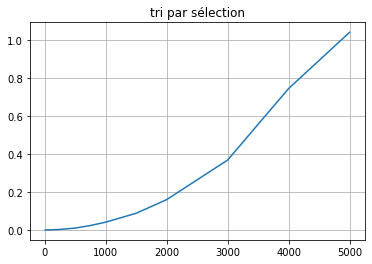

In [20]:
import matplotlib.pyplot as plt

nb_elements=[10,100,250,500,750,1000,1500,2000,3000,4000,5000]
temps = []
for nb in nb_elements:
    tab = [randint(0,100) for _ in range(nb)]
    temps.append(duree_tri(tri_selection,tab)[1])

plt.plot(nb_elements,temps)
plt.title("tri par sélection")

plt.grid()
plt.show()

On trouve une parabole caractéristique d'une fonction carré. La complexité du tri par sélection est en $O(n^2)$.